# Project 2 Code (FINAL)

## Import python packages and data

In [1]:
import pandas as pd
import numpy as np
import pprint
! pip install CurrencyConverter
from currency_converter import CurrencyConverter
import requests

In [2]:
airbnb = pd.read_csv('airbnb.csv')
country_to_letters = pd.read_csv('country-code-to-currency-code-mapping.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## Data cleaning
### 1. Rename all the columns that are mispelled

In [3]:
# Rename all the columns that are mispelled
column_rename = {
  'hourse_rules': 'house_rules',
  'toiles': 'toilets'
}
airbnb = airbnb.rename(columns=column_rename)
airbnb.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,house_rules,img_links,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.00,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.00,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.00,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.00,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.00,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


### 2. Change all datatype to its appropriate type

In [4]:
print("Before changing the types of column")
# replace all commas on "reviews" column
airbnb.reviews.replace({",":""}, inplace=True, regex=True)
# replace all New ratings as -1 to convert column to floats
airbnb.rating.replace({"New":"-1"}, inplace=True, regex=True)

print(airbnb.dtypes)

col_dtypes = {
  'name': 'string',
  'rating': 'float64',
  'reviews': 'int64',
  'host_id': 'int64',
  'price': 'float64',
  'country': 'string',
  'checkin': 'string'
}
airbnb = airbnb.astype(col_dtypes, errors = 'ignore')
print("\nAfter changing the types of column")
airbnb.dtypes

Before changing the types of column
Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
house_rules      object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toilets           int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object

After changing the types of column


Unnamed: 0        int64
id                int64
name             string
rating          float64
reviews           int64
host_name        object
host_id           int64
address          object
features         object
amenities        object
safety_rules     object
house_rules      object
img_links        object
price           float64
country          string
bathrooms         int64
beds              int64
guests            int64
toilets           int64
bedrooms          int64
studios           int64
checkin          string
checkout         object
dtype: object

### 3. Create columns of different amenities we want to study


In [5]:
# Create and look at a sorted list of unique amenities so we can see what are the key amenities we want to look at
unique_amenities = sorted(list(airbnb['amenities'].str.split(',').explode().unique()))
unique_amenities

[' 2–5 years old',
 ' 2–5 years old and 5–10 years old',
 ' 5–10 years old and 10+ years old',
 ' Amazon Prime Video',
 ' Apple TV',
 ' Chromecast',
 ' DVD player',
 ' Disney+',
 ' Fire TV',
 ' HBO Max',
 ' Hulu',
 ' Netflix',
 ' Roku',
 ' cable/satellite TV',
 ' gas powered fridge. refrigerator',
 ' heated',
 ' infinity',
 ' lap pool',
 ' olympic-sized',
 ' open 24 hours',
 ' open specific hours',
 ' rooftop',
 ' saltwater',
 ' standard cable/satellite',
 ' sun loungers',
 ' wood-burning',
 '100" HDTV with Amazon Prime Video',
 '100" TV',
 '100" TV with Chromecast',
 '100" TV with Netflix',
 '101" HDTV with HBO Max',
 '107" HDTV with standard cable/satellite',
 '108" HDTV with standard cable/satellite',
 '12" TV with Amazon Prime Video',
 '12" TV with Netflix',
 '12" TV with standard cable/satellite',
 '12v cool box refrigerator',
 '14" HDTV with cable/satellite TV',
 '14" TV',
 '15" TV',
 '15" TV with standard cable/satellite',
 '16" TV',
 '165" HDTV with cable/satellite TV',
 '17" T

In [6]:
# Make another column that holds the lower case list of all amenities
airbnb['amenities_list'] = airbnb['amenities'].apply(lambda x: [item.lower().strip() for item in x.split(',')])

# Add keywords that will locate the common amenitites
categories = {
    'tv': ['tv'],
    'wifi': ['wifi'],
    'chromecast': ['chromecast'],
    'refrigerator': ['refrigerator', 'fridge'],
    'kitchen': ['kitchen'],
    'view': ['view'],
    'parking': ['parking'],
    'workspace': ['workspace'],
    'pool': ['pool'],
    'gym': ['gym'],    
}

# Initialize columns with "no"
for category in categories:
    airbnb[category] = False

# Update columns with "yes" where the amenity is present
for category, keywords in categories.items():
    airbnb[category] = airbnb['amenities_list'].apply(
        lambda x: True if any(keyword in ' '.join(x) for keyword in keywords) else False
    )

### 4. Create columns of different house rules we want to study


In [7]:
# Create and look at a sorted list of unique house rules so we can see what are the key house rules we want to look at
unique_house_rules = sorted(list(airbnb['house_rules'].str.split(',').explode().unique()))
unique_house_rules

['',
 'Check out: 10:00 am',
 'Check out: 10:00 pm',
 'Check out: 11:00 am',
 'Check out: 11:00 pm',
 'Check out: 12:00 am',
 'Check out: 12:00 pm',
 'Check out: 1:00 am',
 'Check out: 1:00 pm',
 'Check out: 2:00 am',
 'Check out: 2:00 pm',
 'Check out: 3:00 am',
 'Check out: 3:00 pm',
 'Check out: 4:00 am',
 'Check out: 4:00 pm',
 'Check out: 5:00 pm',
 'Check out: 6:00 pm',
 'Check out: 7:00 am',
 'Check out: 7:00 pm',
 'Check out: 8:00 am',
 'Check out: 8:00 pm',
 'Check out: 9:00 am',
 'Check-in: 10:00 am - 10:00 pm',
 'Check-in: 10:00 am - 11:00 pm',
 'Check-in: 10:00 am - 12:00 am',
 'Check-in: 10:00 am - 12:00 pm',
 'Check-in: 10:00 am - 1:00 am',
 'Check-in: 10:00 am - 1:00 pm',
 'Check-in: 10:00 am - 2:00 pm',
 'Check-in: 10:00 am - 3:00 pm',
 'Check-in: 10:00 am - 4:00 pm',
 'Check-in: 10:00 am - 5:00 pm',
 'Check-in: 10:00 am - 6:00 pm',
 'Check-in: 10:00 am - 7:00 pm',
 'Check-in: 10:00 am - 8:00 pm',
 'Check-in: 10:00 am - 9:00 pm',
 'Check-in: 10:00 pm - 12:00 am',
 'Chec

In [8]:
# Make another column that holds the lower case list of all house_rules
airbnb['house_rules_list'] = airbnb['house_rules'].apply(lambda x: [item.lower().strip() for item in x.split(',')])

# Add keywords that will locate the house rules of interest
categories = {
    'no_pets': ['no pets'],
    'no_smoking': ['no smoking'],
    'no_parties_or_events': ['no parties or events']
}

# Initialize columns with "no"
for category in categories:
    airbnb[category] = "no"

# Update columns with "yes" where the house rule is present
for category, keywords in categories.items():
    airbnb[category] = airbnb['house_rules_list'].apply(
        lambda x: True if any(keyword in x for keyword in keywords) else False)

#### 5. Create columns of different safety rules we want to study

In [9]:
# Create and look at a sorted list of unique safety rules so we can see what are the key safety rules we want to look at
unique_safety_rules = sorted(list(airbnb['safety_rules'].str.split(',').explode().unique()))
unique_safety_rules

# after looking at the output, we decide not to include any of these safety rules as categories

['',
 ' other body of water',
 ' river',
 "Airbnb's COVID-19 safety practices apply",
 'Carbon monoxide alarm',
 'Carbon monoxide alarm not reported Show more',
 'Carbon monoxide detector not required Show more',
 'Climbing or play structure',
 'Heights without rails or protection',
 'May encounter potentially dangerous animals',
 'Nearby lake',
 'No carbon monoxide alarm',
 'No smoke alarm',
 'Not Available',
 'Pool/hot tub without a gate or lock',
 'Security camera/recording device Show more',
 'Show more',
 'Smoke alarm',
 'Smoke alarm not reported Show more',
 '\U000f1801',
 '\U000f1803',
 '\U000f1806',
 '\U000f9001']

#### 6. Create columns that have the total number of house rules, image links, and amenities

In [10]:
# Make another column that holds the lower case list of all image links
airbnb['img_links_list'] = airbnb['img_links'].apply(lambda x: [item.lower().strip() for item in x.split(' ')])

In [11]:
# Create three columns, each having the total number of house rules, image links, and amenities
airbnb['house_rules_num'] = airbnb['house_rules_list'].apply(lambda x:len(x))
airbnb['img_links_num'] = airbnb['img_links_list'].apply(lambda x:len(x))
airbnb['amenities_num'] = airbnb['amenities_list'].apply(lambda x:len(x))

#### 7. Look at checkin and checkout columns to see how they can be cleaned

In [12]:
airbnb.checkin.value_counts(dropna=False).reset_index().head(10)

,index,checkin
0,After 3 00 pm,2554
1,After 2 00 pm,1545
2,Flexible,926
3,<NA>,800
4,After 4 00 pm,650
5,After 12 00 pm,644
6,After 1 00 pm,531
7,3 00 pm - 10 00 pm,312
8,3 00 pm - 8 00 pm,268
9,3 00 pm - 9 00 pm,243


In [13]:
airbnb.checkout.value_counts(dropna=False).reset_index().sort_values('index')

,index,checkout
14,1 00 am,12
5,1 00 pm,178
2,10 00 am,2622
16,10 00 pm,4
0,11 00 am,4391
13,11 00 pm,15
6,12 00 am,82
1,12 00 pm,2648
15,2 00 am,6
7,2 00 pm,72


#### 8. When there are no checkin or checkout time, then we will assume it's flexible and fill it as such

In [14]:
# fill na for checkin with Flexible
airbnb["checkin"].fillna("Flexible", inplace = True)
# fill na for checkout with Flexible
airbnb["checkout"].fillna("Flexible", inplace = True)

#### 9. Check to see if we have any duplicated ids

In [15]:
airbnb[airbnb.duplicated(['id'], keep = False)] # no duplicated ids. 

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,house_rules,img_links,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,amenities_list,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,house_rules_list,no_pets,no_smoking,no_parties_or_events,img_links_list,house_rules_num,img_links_num,amenities_num


#### 10. Check if currency is likely in USD or in local currency, and see if the column is usable

In [16]:
# Groupby country to find mean price
country_mean_prices = airbnb.groupby('country')['price'].mean()

# Sort the mean prices in ascending order
country_mean_prices = country_mean_prices.sort_values()
country_mean_prices # These look way too large. Some of them seem to convert well to USD; we will convert them all the USD next.

country
 Senegal                  1289.00
Jordan                    1812.00
Georgia                   1906.33
Cuba                      2276.50
 Bolivia                  2462.00
                           ...   
 Qatar                  112717.50
 Bahamas                116397.50
 United Arab Emirates   119633.65
 Honduras               140998.50
 Seychelles             155225.11
Name: price, Length: 148, dtype: float64

In [17]:
# redefine country to match all.csv country name
# Unique country names from all_countries
all_countries_set = set(airbnb['country'].str.strip())
# Unique country names from country_to_letters
country_to_letters_set = set(country_to_letters['Country'])
missing_countries = all_countries_set - country_to_letters_set
pprint.pp(missing_countries)

# # change the values of country to match the all.csv file
country_change = {
  'Australia': 'Australian',
  'Bosnia & Herzegovina': 'Bosnia and Herzegovina',
  'Brunei': 'Brunei Darussalam',
  'Congo': 'Congo Republic of the Democratic',
  'Croatia': 'Croatia (Hrvatska)',
  'Czechia': 'Czech Republic',
  # kosovo could be equivalent to germany bc they both use euro
  'Kosovo': 'Germany',
  'Slovakia': 'Slovakia (Slovak Republic)',
  'South Korea': 'Korea South',
  'St Martin': 'Saint Martin (French part)',
  'Svalbard & Jan Mayen': 'Svalbard and Jan Mayen Islands',
  # Åland Islands could be equivalent to germany bc they both use euro
  'Åland Islands': 'Germany'}

airbnb.country.replace(country_change, inplace=True, regex=True)



{'Australia',
 'Bosnia & Herzegovina',
 'Brunei',
 'Congo',
 'Croatia',
 'Czechia',
 'Kosovo',
 'Slovakia',
 'South Korea',
 'St Martin',
 'Svalbard & Jan Mayen',
 'Åland Islands'}


In [18]:
# Function to convert price to USD
def convert_price_to_usd(row, converter):
    try:
        # remove whitespace
        country_clean = row['country'].strip()
        # locate the country on country code to currency code df and find 3 digit currency code
        country_code_series = country_to_letters.loc[country_to_letters['Country'] == country_clean]['Code']
        # should have one currency code
        country_code = country_code_series.values[0]
        # change from country code price to usd
        usd_price = converter.convert(row['price'], country_code, 'USD')
        return usd_price
    # if any error happens print and return none
    except Exception as e:
        print(f"Error converting price for {row['country']}: {e}")
        return None

# Initialize the converter
converter = CurrencyConverter()

# Apply the conversion function to the DataFrame
airbnb['usd_price'] = airbnb.apply(convert_price_to_usd, axis=1, converter=converter)

Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Vietnam: VND is not a supported currency
Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Lebanon: LBP is not a supported currency
Error converting price for  Taiwan: TWD is not a supported currency
Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Vietnam: VND is not a supported currency
Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Vietnam: VND is not a supported currency
Error converting price for  Armenia: AMD is not a supported currency
Error converting price for  Georgia: GEL is not a supported currency
Error converting price for  Taiwan: TWD is not a supported currency
Error converting price for  Vietnam:

In [19]:
countries_with_nan_usd_price = airbnb[airbnb['usd_price'].isna()]['country'].unique()
countries_with_nan_usd_price

<StringArray>
[                         ' Georgia',                          ' Vietnam',
                          ' Lebanon',                           ' Taiwan',
                          ' Armenia',                          ' Ukraine',
                          ' Albania',                         ' Tanzania',
                        ' Sri Lanka',           ' Bosnia and Herzegovina',
                            ' Kenya',                           ' Serbia',
                       ' Seychelles',                          ' Morocco',
                            ' Egypt',             ' United Arab Emirates',
                         ' Pakistan',                            ' Nepal',
                         'Sri Lanka',                         ' Cambodia',
                       ' Azerbaijan',                       ' Costa Rica',
                           ' Panama',                             ' Peru',
                            ' Chile',                           ' Belize',
           

In [20]:
def get_exchange_rates(base_currency='USD'):
    url = 'https://api.exchangerate-api.com/v4/latest/' + base_currency
    response = requests.get(url)
    data = response.json()
    return data['rates']

# Fetch exchange rates
exchange_rates = get_exchange_rates()

# Define currency codes for the countries of interest
currency_codes = {
    'Georgia': 'GEL',
    'Vietnam': 'VND',
    'Lebanon': 'LBP',
    'Taiwan': 'TWD',
    'Armenia': 'AMD',
    'Ukraine': 'UAH',
    'Albania': 'ALL',
    'Tanzania': 'TZS',
    'Sri Lanka': 'LKR',
    'Bosnia and Herzegovina': 'BAM',
    'Kenya': 'KES',
    'Serbia': 'RSD',
    'Seychelles': 'SCR',
    'Morocco': 'MAD',
    'Egypt': 'EGP',
    'United Arab Emirates': 'AED',
    'Pakistan': 'PKR',
    'Nepal': 'NPR',
    'Cambodia': 'KHR',
    'Azerbaijan': 'AZN',
    'Costa Rica': 'CRC',
    'Panama': 'PAB',
    'Peru': 'PEN',
    'Chile': 'CLP',
    'Belize': 'BZD',
    'Colombia': 'COP',
    'Bolivia': 'BOB',
    'Mauritius': 'MUR',
    'Fiji': 'FJD',
    'Maldives': 'MVR',
    'Myanmar': 'MMK',
    'Brunei Darussalam': 'BND',
    'Kyrgyzstan': 'KGS',
    'Uruguay': 'UYU',
    'Argentina': 'ARS',
    'Bahamas': 'BSD',
    'Oman': 'OMR',
    'Kuwait': 'KWD',
    'Saudi Arabia': 'SAR',
    'Kazakhstan': 'KZT',
    'Uganda': 'UGX',
    'Qatar': 'QAR',
    'Jordan': 'JOD',
    'Bangladesh': 'BDT',
    'Mongolia': 'MNT',
    'Uzbekistan': 'UZS',
    'Rwanda': 'RWF',
    'Honduras': 'HNL',
    'Nicaragua': 'NIO',
    'Vanuatu': 'VUV',
    'Cayman Islands': 'KYD',
    'French Polynesia': 'XPF',
    'Jamaica': 'JMD',
    'Madagascar': 'MGF',
    'Tunisia': 'TND',
    'Congo Republic of the Democratic': 'CDF',
    'Cuba': 'CUP',
    'Nigeria': 'NGN',
    'Saint Martin (French part)': 'EUR',
    'Guatemala': 'GTQ',
    'Senegal': 'XOF',
    'Namibia': 'NAD'
}

# Convert to USD
conversion_rates = {}
for country, currency in currency_codes.items():
    if currency in exchange_rates:
        conversion_rates[country] = 1/exchange_rates[currency]
    else:
        conversion_rates[country] = None
        print(f"Currency rate for {currency} not found.")

print(conversion_rates)
# manually looked the conversion and set currency conversion rate
conversion_rates['Madagascar'] = 0.0000440133

Currency rate for MGF not found.
{'Georgia': 0.3676470588235294, 'Vietnam': 3.9645992999310556e-05, 'Lebanon': 1.11731843575419e-05, 'Taiwan': 0.030609121518212427, 'Armenia': 0.002577386015103482, 'Ukraine': 0.0243842965130456, 'Albania': 0.010800302408467436, 'Tanzania': 0.00037168641560488246, 'Sri Lanka': 0.0033096144299189145, 'Bosnia and Herzegovina': 0.5524861878453039, 'Kenya': 0.007732755954222085, 'Serbia': 0.00925154963456379, 'Seychelles': 0.07363770250368189, 'Morocco': 0.10101010101010101, 'Egypt': 0.020588840848260244, 'United Arab Emirates': 0.2724795640326976, 'Pakistan': 0.0035883450552605138, 'Nepal': 0.007464357692020602, 'Cambodia': 0.00024322496850236658, 'Azerbaijan': 0.5882352941176471, 'Costa Rica': 0.0019081420420936134, 'Panama': 1.0, 'Peru': 0.2680965147453083, 'Chile': 0.0010470107842110773, 'Belize': 0.5, 'Colombia': 0.0002453397710489257, 'Bolivia': 0.14450867052023122, 'Mauritius': 0.02147766323024055, 'Fiji': 0.4424778761061947, 'Maldives': 0.0647668393

In [21]:
# execute the conversion
def convert_curr(row):
  country = row['country'].strip()
  # if country is that of counversion rates dictionary, convert
  if country in conversion_rates:
    return row.price * conversion_rates[country]
  # else leave usd price as is (bc already coverted)
  else:
    return row.usd_price

airbnb['usd_price'] = airbnb.apply(lambda row: convert_curr(row), axis=1)
airbnb.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,house_rules,img_links,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,amenities_list,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,house_rules_list,no_pets,no_smoking,no_parties_or_events,img_links_list,house_rules_num,img_links_num,amenities_num,usd_price
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078.00,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,"[mountain view, valley view, lake access, kitc...",True,True,False,False,True,True,True,False,False,False,"[check-in: flexible, check out: 12:00 pm, pets...",False,False,False,[https://a0.muscache.com/im/pictures/a5da5cb7-...,5,6,10,244.14
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,-1.00,0,Fatih,386223873,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665.00,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,"[kitchen, wifi, dedicated workspace, free park...",True,True,False,False,True,False,True,True,True,False,"[check-in: 4:00 pm - 11:00 pm, check out: 10:0...",True,True,True,[https://a0.muscache.com/im/pictures/61b70855-...,5,6,10,140.99
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991.00,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,"[mountain view, kitchen, wifi, dedicated works...",True,True,False,False,True,True,True,True,False,False,"[check-in: after 1:00 pm, check out: 12:00 pm,...",False,False,False,[https://a0.muscache.com/im/pictures/miso/host...,4,6,10,2202.57
3,3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339.00,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,"[mountain view, valley view, kitchen, wifi, fr...",True,True,False,False,True,True,True,False,True,False,"[check-in: after 2:00 pm, check out: 12:00 pm,...",True,True,False,[https://a0.muscache.com/im/pictures/72e6396e-...,4,6,10,342.70
4,4,51245886,Bungalov Ev 2,-1.00,0,Arp Sapanca,414884116,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673.00,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,"[kitchen, wifi, free parking on premises, tv, ...",True,True,False,False,True,False,True,False,False,False,"[check-in: after 2:00 pm, check out: 12:00 pm,...",True,True,True,[https://a0.muscache.com/im/pictures/73973308-...,8,6,8,201.68


In [22]:
# check if the prices in USD makes sense

# Group by country and find the minimum price for each country
country_mean_prices_usd = airbnb.groupby('country')['usd_price'].mean()
# Sort the mean prices in ascending order
country_mean_prices_usd = country_mean_prices_usd.sort_values()
country_mean_prices_usd # Unfortunately the prices column does not seem usable. These values are still too bizzare.

country
 Lebanon           0.15
 Madagascar        0.22
 Uzbekistan        0.28
 Vietnam           0.45
 Indonesia         1.14
                 ...   
Belize         55301.50
 Belize        55787.58
 Malta         56086.45
 Kuwait       112295.08
 Bahamas      116397.50
Name: usd_price, Length: 146, dtype: float64

#### 11. Drop unnecessary columns

In [23]:
# Drop unnecessary columns Unnamed: 0, host_name,	address, features,	amenities, amenities_list, house_rules, price (because we have new column called usd_price)
airbnb.drop(['Unnamed: 0', 'host_name', 'features',	'amenities', 'safety_rules', 'amenities_list', 'house_rules','house_rules_list', 'safety_rules','img_links_list','img_links', 'usd_price', 'price'], axis=1, inplace=True)

In [24]:
# final dataframe to analyze
airbnb.head()

,id,name,rating,reviews,host_id,address,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
0,49849504,Perla bungalov,4.71,64,357334205,"Kartepe, Kocaeli, Turkey",Turkey,1,1,2,0,2,0,Flexible,12 00 pm,True,True,False,False,True,True,True,False,False,False,False,False,False,5,6,10
1,50891766,Authentic Beach Architect Sheltered Villa with...,-1.00,0,386223873,"Kaş, Antalya, Turkey",Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,True,True,False,False,True,False,True,True,True,False,True,True,True,5,6,10
2,50699164,cottages sataplia,4.85,68,409690853,"Imereti, Georgia",Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,True,True,False,False,True,True,True,True,False,False,False,False,False,4,6,10
3,49871422,Sapanca Breathable Bungalow,5.00,13,401873242,"Sapanca, Sakarya, Turkey",Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,True,True,False,False,True,True,True,False,True,False,True,True,False,4,6,10
4,51245886,Bungalov Ev 2,-1.00,0,414884116,"Sapanca, Sakarya, Turkey",Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,True,True,False,False,True,False,True,False,False,False,True,True,True,8,6,8


#### 12. Export cleaned data

In [25]:
#airbnb.to_csv('airbnb_clean_2.csv')

## Data analysis

#### Import packages for visualization

In [26]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [56]:
# create a new dataframe that drops all the ratings that are -1
airbnb_small = airbnb[airbnb['rating'] > 0].copy()


#### Look for correlations

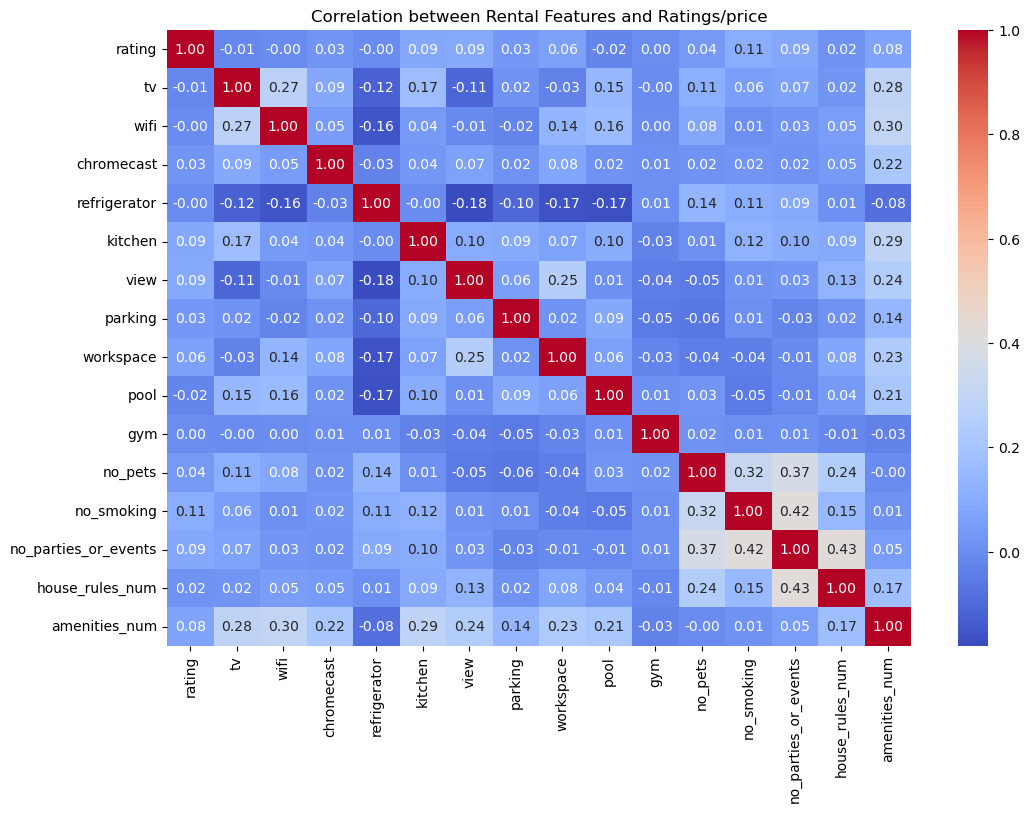

In [58]:
# Compute correlation matrix
corr = airbnb_small[['rating', 'tv', 'wifi', 'chromecast', 'refrigerator', 'kitchen', 'view', 
           'parking', 'workspace', 'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events', 
           'house_rules_num', 'amenities_num']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Rental Features and Ratings/price')
plt.show()

#### Operationalizing a 'stellar' listing, which is one with high rating and high number of reviews

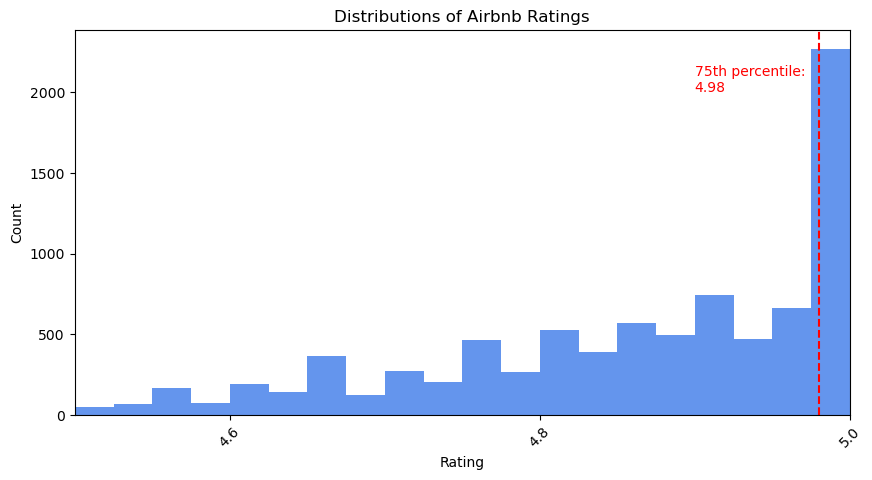

In [27]:
# Look at the distribution of ratings to decide what is considered a high rating.

# calculate the 75th percentile for rating
high_rating_threshold = airbnb_small['rating'].quantile(0.75)

# initialize figure
fig, ax = plt.subplots(figsize=(10, 5))

# plot histogram with the specified bins
sns.histplot(airbnb_small['rating'], bins = 80, kde = False, ax = ax, color = 'cornflowerblue', edgecolor='black', linewidth=0.0,alpha = 1)
ax.set_title('Distributions of Airbnb Ratings')
ax.set_ylabel('Count')
ax.set_xlabel('Rating')

# Add a line for the 80th percentile
ax.axvline(high_rating_threshold, color = 'red', linestyle = 'dashed')
ax.text(4.90, 2000,f'75th percentile:\n{high_rating_threshold:.2f}', color = 'red')

# set xticks
xticks = np.arange(4, airbnb['rating'].max()+0.2, 0.2)
ax.set_xticks(xticks)
plt.xticks(rotation=45)
ax.set_xlim(left = 4.5, right = 5.0)

# show plot
plt.show()

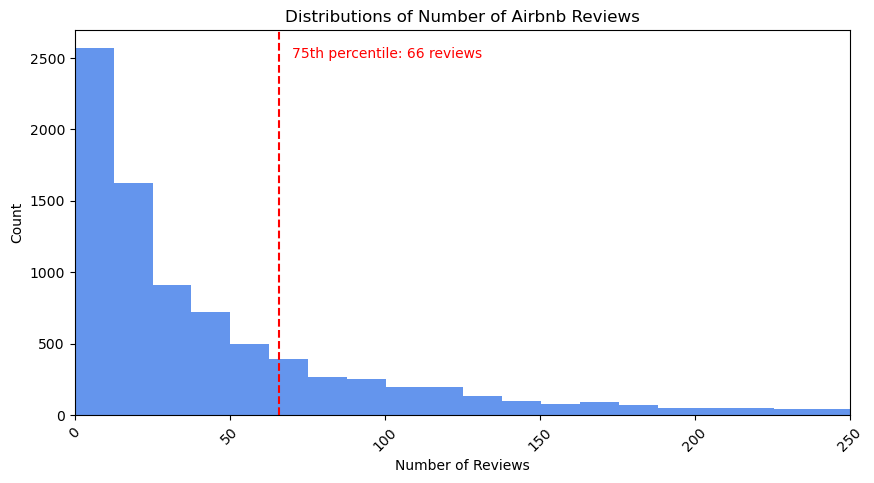

In [28]:
# Look at the distribution of reviews to decide what is considered a high number of reviews. This is as proxy indicator for a popular (or infamous listing)

# calculate the 75th percentile for number of reviews
high_reviews_threshold = int(airbnb_small['reviews'].quantile(0.75))

# initialize figure
fig, ax = plt.subplots(figsize=(10, 5))

# plot histogram with the specified bins
sns.histplot(airbnb_small['reviews'], bins = 80, kde = False, ax = ax, color = 'cornflowerblue', edgecolor='black', linewidth=0.0, alpha = 1)
ax.set_title('Distributions of Number of Airbnb Reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Reviews')

# Add a line for the 90th percentile
ax.axvline(high_reviews_threshold, color = 'red', linestyle = 'dashed')
ax.text(70, 2500,f'75th percentile: {high_reviews_threshold} reviews', color = 'red')

# set x-ticks
xticks = range(0, airbnb['reviews'].max()+10, 50)
ax.set_xticks(xticks)
plt.xticks(rotation=45)
ax.set_xlim(left = 0, right = 250)

#show plot
plt.show()

In [29]:
# label listings that have rating and number of reviews at and above their respective 80th percentiles as stellar
airbnb_small['stellar'] = (airbnb_small['reviews'] >= high_reviews_threshold) & (airbnb_small['rating'] >= high_rating_threshold)

In [30]:
# See number of stellar listing
len(airbnb_small[airbnb_small['stellar'] == True])

233

#### Compare stellar and non-stellar listings: by number of house rules

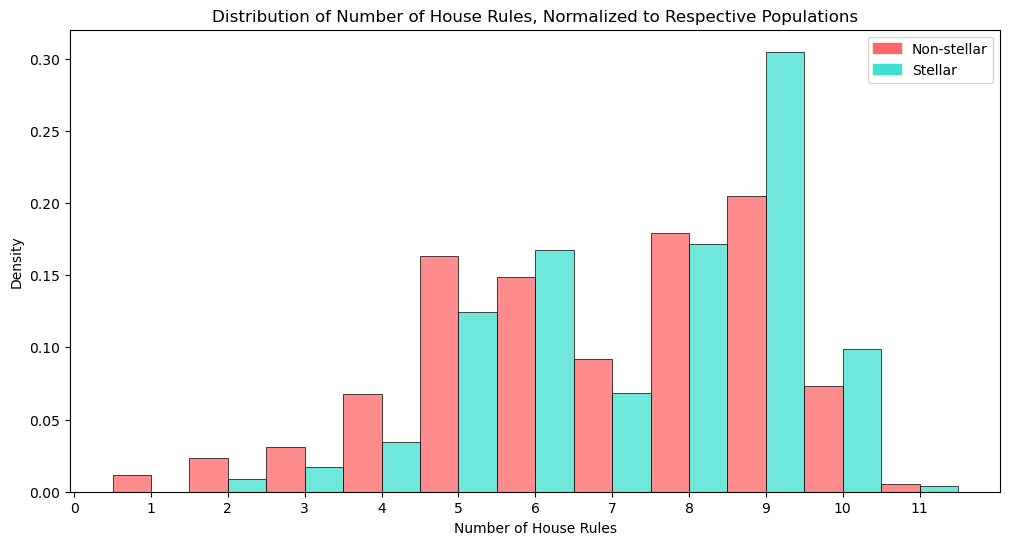

In [31]:
#Study the number of house rules stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
sns.histplot(data=airbnb_small, x='house_rules_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['#ff6666', '#40e0d0'], edgecolor='black', linewidth=0.5,bins=30, stat = 'density',common_norm=False, discrete = True)

# Set titles and labels
ax.set_title('Distribution of Number of House Rules, Normalized to Respective Populations')
ax.set_xlabel('Number of House Rules')
ax.set_ylabel('Density')

# Create custom legend
legend_patches = [
    Patch(color='#ff6666', label='Non-stellar'),
    Patch(color='#40e0d0', label='Stellar')
]
ax.legend(handles=legend_patches, loc='upper right')

# set x-ticks
xticks = range(0, 12, 1)
ax.set_xticks(xticks)

# Show plot
plt.show()

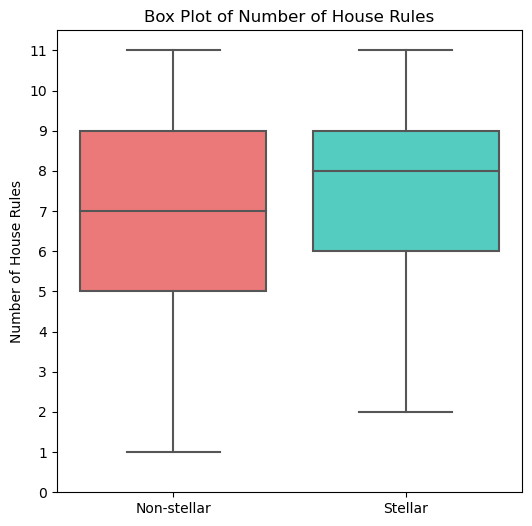

In [32]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot boxplot
sns.boxplot(data=airbnb_small, y='house_rules_num', x = 'stellar', palette=['#ff6666', '#40e0d0'])

# Set titles and labels
ax.set_title('Box Plot of Number of House Rules')
ax.set_ylabel('Number of House Rules')
ax.set_xlabel('')

# set x-ticks
xticks = range(0, 2, 1)
ax.set_xticks(xticks)
ax.set_xticklabels(['Non-stellar', 'Stellar'])

# set y-ticks
yticks = range(0, 12, 1)
ax.set_yticks(yticks)

# Show plot
plt.show()

#### Compare stellar and non-stellar listings: by number image links

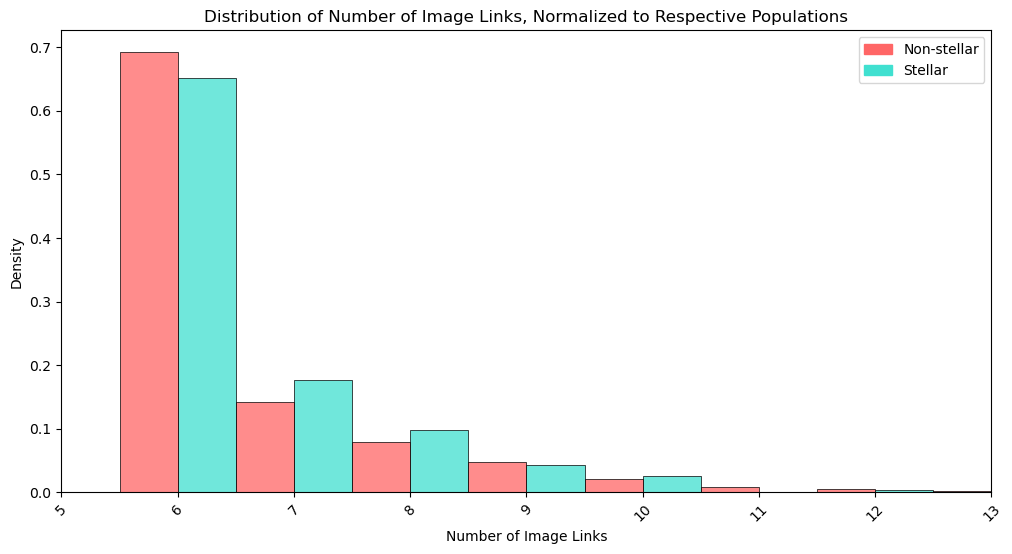

In [33]:
#Study the number of image links stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
sns.histplot(data=airbnb_small, x='img_links_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['#ff6666', '#40e0d0'], edgecolor='black', linewidth=0.5, bins=range(0, 23, 1), stat = 'density',common_norm=False, discrete = True)

# Set titles and labels
ax.set_title('Distribution of Number of Image Links, Normalized to Respective Populations')
ax.set_xlabel('Number of Image Links')
ax.set_ylabel('Density')

# Create custom legend
legend_patches = [
    Patch(color='#ff6666', label='Non-stellar'),
    Patch(color='#40e0d0', label='Stellar')
]
ax.legend(handles=legend_patches, loc='upper right')

# set x-ticks
xticks = range(0, 23, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)
ax.set_xlim(left = 5, right = 13)

# Show plot
plt.show()


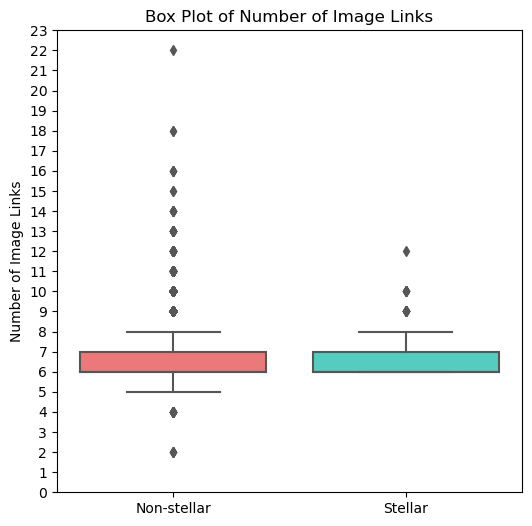

In [34]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot boxplot
sns.boxplot(data=airbnb_small, y='img_links_num', x = 'stellar', palette=['#ff6666', '#40e0d0'])

# Set titles and labels
ax.set_title('Box Plot of Number of Image Links')
ax.set_ylabel('Number of Image Links')
ax.set_xlabel('')

# set x-ticks
xticks = range(0, 2, 1)
ax.set_xticks(xticks)
ax.set_xticklabels(['Non-stellar', 'Stellar'])

# set y-ticks
yticks = range(0, 24, 1)
ax.set_yticks(yticks)

# Show plot
plt.show()

#### Compare stellar and non-stellar listings: by number of amenities

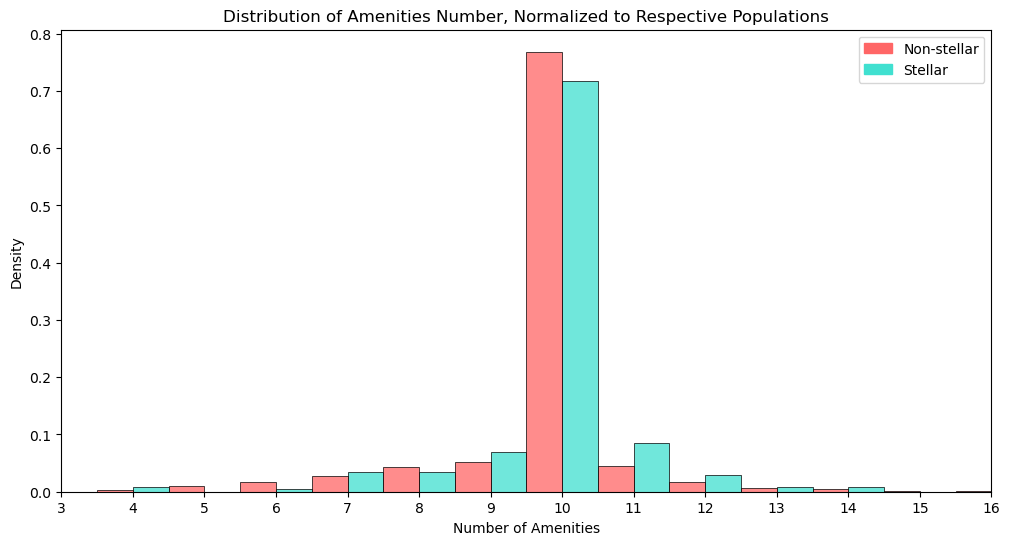

In [35]:
#Study the number of amenities stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
sns.histplot(data=airbnb_small, x='amenities_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['#ff6666', '#40e0d0'], edgecolor='black', linewidth=0.5, bins=30, stat = 'density',common_norm=False, discrete = True)

# Set titles and labels
ax.set_title('Distribution of Amenities Number, Normalized to Respective Populations')
ax.set_xlabel('Number of Amenities')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 21, 1)
ax.set_xticks(xticks)
ax.set_xlim(3,16)

# Create custom legend
legend_patches = [
    Patch(color='#ff6666', label='Non-stellar'),
    Patch(color='#40e0d0', label='Stellar')
]
ax.legend(handles=legend_patches, loc='upper right')

# Show plot
plt.show()

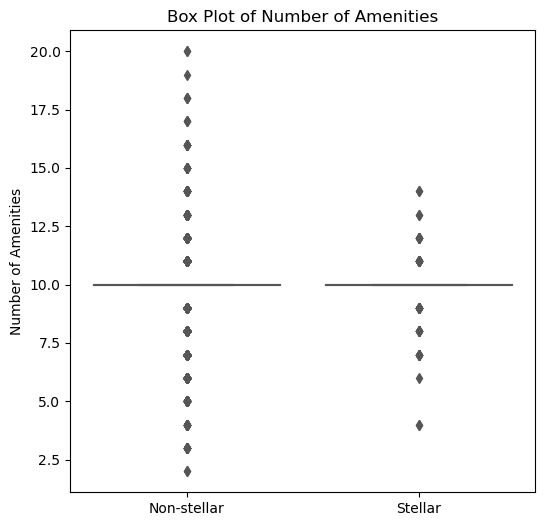

In [36]:
# Initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot boxplot
sns.boxplot(data=airbnb_small, y='amenities_num', x = 'stellar', palette=['#ff6666', '#40e0d0'])

# Set titles and labels
ax.set_title('Box Plot of Number of Amenities')
ax.set_ylabel('Number of Amenities')
ax.set_xlabel('')


# set x-ticks
xticks = range(0, 2, 1)
ax.set_xticks(xticks)
ax.set_xticklabels(['Non-stellar', 'Stellar'])

# Show plot
plt.show()

#### Comparing Proportion of Stellar/Non-stellar Listings by Amenity

In [37]:
airbnb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_id', 'address', 'country',
       'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms', 'studios',
       'checkin', 'checkout', 'tv', 'wifi', 'chromecast', 'refrigerator',
       'kitchen', 'view', 'parking', 'workspace', 'pool', 'gym', 'no_pets',
       'no_smoking', 'no_parties_or_events', 'house_rules_num',
       'img_links_num', 'amenities_num'],
      dtype='object')

In [38]:
# List of binary columns to study
binary_columns = ['tv', 'wifi', 'refrigerator', 'kitchen', 'view', 
                  'parking', 'workspace', 'pool','no_pets', 'no_smoking', 'no_parties_or_events','chromecast', 'gym'] # didn't take gym or chromecast as hardly any listings have those


In [39]:
# groupby stellar since we study stellar vs non-stellar listings
groupby_stellar = airbnb_small.groupby('stellar')

# calculate proportion of respective listings that have the amenity
proportions = round(groupby_stellar[binary_columns].mean() * 100, 1)

# pivot the table to prepare it for seaborn
proportions_pivoted = proportions.unstack().reset_index()

# renaming columns
proportions_pivoted.columns = ['amenity', 'stellar', 'proportion']

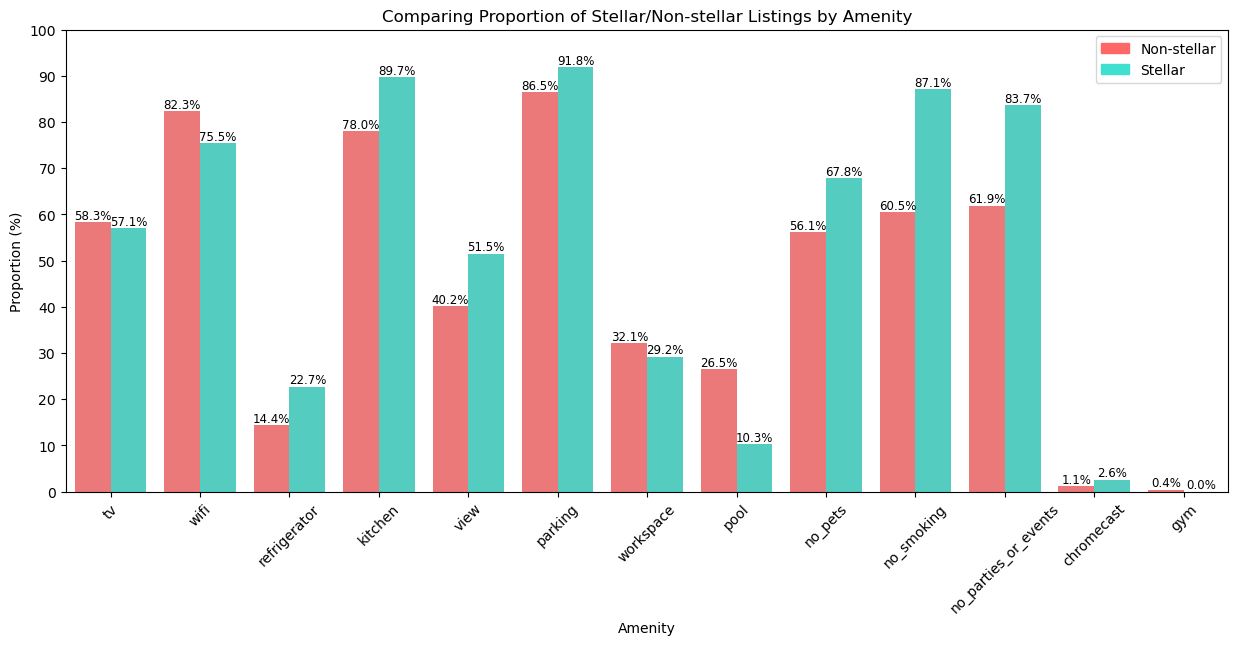

In [43]:
#Study the percentage yes of each amenity listed for both stellar and non-stellar listings

# Initialize figure
fig, ax = plt.subplots(figsize=(15, 6))

# Plot histogram
sns.barplot(data=proportions_pivoted, x='amenity', y = 'proportion', hue = 'stellar', palette=['#ff6666', '#40e0d0']) #,edgecolor='black', linewidth=0.5)

# # Set titles and labels
ax.set_title('Comparing Proportion of Stellar/Non-stellar Listings by Amenity')
ax.set_xlabel('Amenity')
ax.set_ylabel('Proportion (%)')

# set x-ticks
#xticks = range(0, 21, 1)
#ax.set_xticks(xticks)
#ax.set_xlim(3,16)
plt.xticks(rotation=45)

# set y-ticks
yticks = range(0, 110, 10)
ax.set_yticks(yticks)

# Create custom legend
legend_patches = [
    Patch(color='#ff6666', label='Non-stellar'),
    Patch(color='#40e0d0', label='Stellar')
]
ax.legend(handles=legend_patches, loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8.5)

#Show plot
plt.show()

#### Look for countries that have both a high number and proportion of stellar listings

In [44]:
#create stellar column for main airbnb dataframe also (edit no need this line?)
#airbnb_small['stellar'] = (airbnb_small['reviews'] >= high_reviews_threshold) & (airbnb_small['rating'] >= high_rating_threshold)

# groupby country and stellar
airbnb_by_country_stellar = airbnb_small.groupby(['country', 'stellar'])

# find the top 10 countries with the most number of stellar listings
top_10_countries_raw_num = airbnb_by_country_stellar['country'].count().unstack().sort_values(by = True, ascending = False).head(10)
top_10_countries_raw_num = top_10_countries_raw_num.reindex([True,False], axis = 1)
top_10_countries_raw_num

stellar,True,False
country,,
United Kingdom,60.00,236.00
United States,18.00,158.00
Greece,18.00,730.00
France,16.00,397.00
Italy,15.00,713.00
Poland,8.00,90.00
Norway,8.00,176.00
Japan,7.00,302.00
Iceland,7.00,23.00


In [45]:
top_10_countries_stellar_percentage = airbnb_by_country_stellar['country'].count().unstack().apply(lambda x : x/x.sum() * 100, axis =1).sort_values(by = True, ascending = False)
top_10_countries_stellar_percentage = top_10_countries_stellar_percentage.reindex([True,False], axis = 1)
top_10_countries_stellar_percentage.head(10)

stellar,True,False
country,,
Ireland,33.33,66.67
Belize,28.57,71.43
Costa Rica,25.00,75.00
Peru,25.00,75.00
Iceland,23.33,76.67
United Kingdom,20.27,79.73
India,20.00,80.00
Latvia,10.53,89.47
United States,10.23,89.77


In [46]:
# Extract the top 10 countries with the most number of stellar listings
top_10_countries_raw_num_names = set(top_10_countries_raw_num.index.get_level_values('country'))
print(top_10_countries_raw_num_names)
# Extract the top 10 countries with the highest percentage of stellar listings
top_ten_countries_stellar_percentage_names = set(top_10_countries_stellar_percentage.head(10).index.get_level_values('country'))
print(top_ten_countries_stellar_percentage_names)

{' Japan', ' United States', ' Poland', ' Romania', ' United Kingdom', ' Norway', ' France', ' Italy', ' Iceland', ' Greece'}
{' Belize', ' Latvia', ' Ireland', 'India', ' United Kingdom', ' Canada', ' Peru', ' Iceland', ' United States', ' Costa Rica'}


In [47]:
country_summary = airbnb_small.groupby('country').agg({'rating': 'mean', 'reviews': 'sum'}).reset_index()

In [48]:
# Filter the rows where the country is in the target set
top_10_most_stellar_listings = country_summary[country_summary['country'].isin(top_10_countries_raw_num_names)]
top_10_most_stellar_listings = top_10_most_stellar_listings.sort_values(by=['rating', 'reviews'], ascending=[False, False])

top_10_most_stellar_listings.head()

,country,rating,reviews
103,United Kingdom,4.94,30451
104,United States,4.92,23251
80,Romania,4.91,3955
77,Poland,4.89,3338
38,Iceland,4.89,7776


In [49]:
def plot_bar(df, x, y, label_var, text_pad, title, x_label, y_label, x_lim_flag):
    # Plot for Average Rating by Country with Number of Reviews Annotation
    plt.figure(figsize=(14, 7))
    bars = plt.barh(df[x], df[y], color='cornflowerblue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.gca().invert_yaxis()  # Invert the y-axis to have the highest rating at the top
    if x_lim_flag:
        plt.xlim(4, 5.05)

    # Annotating each bar with the number of reviews
    for bar, r in zip(bars, df[label_var]):
        plt.text(
            bar.get_width() + text_pad,  # Adjust position relative to bar width
            bar.get_y() + bar.get_height() / 2, 
            f'{r:.2f}', 
            va='center', 
            ha='left'
        )

    plt.tight_layout()
    plt.show()

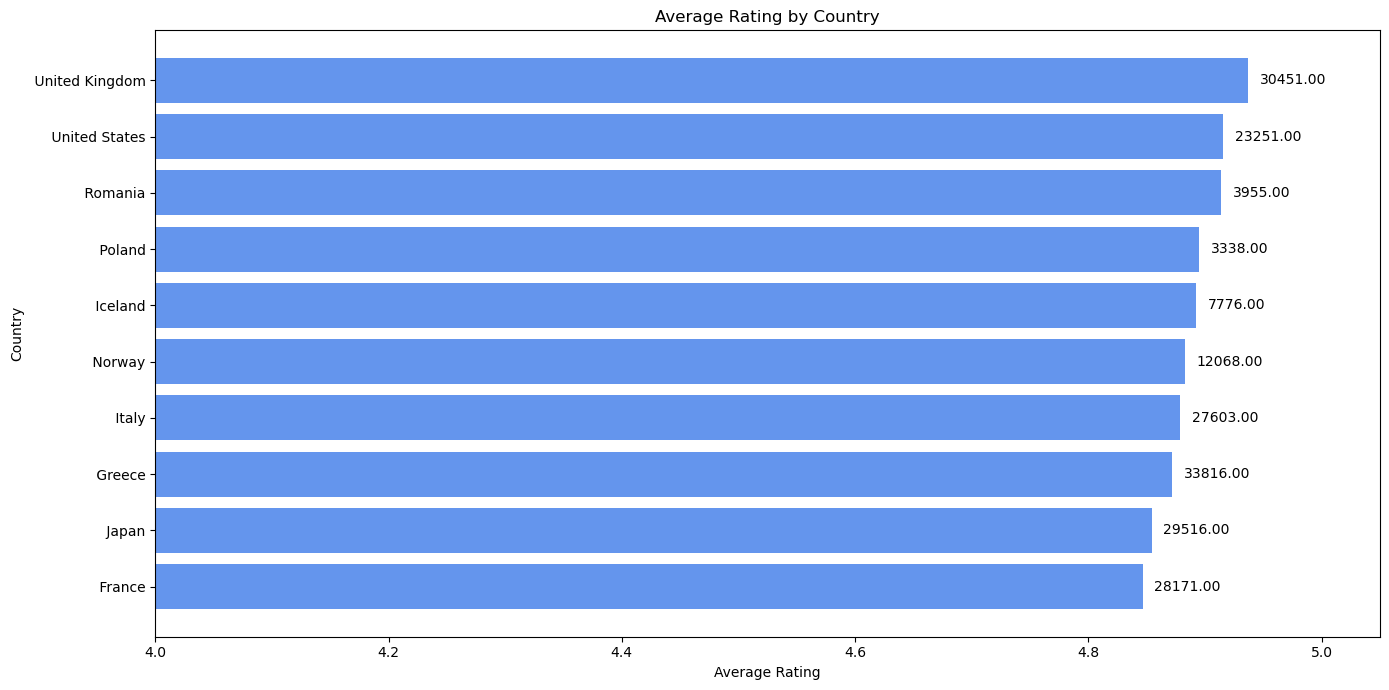

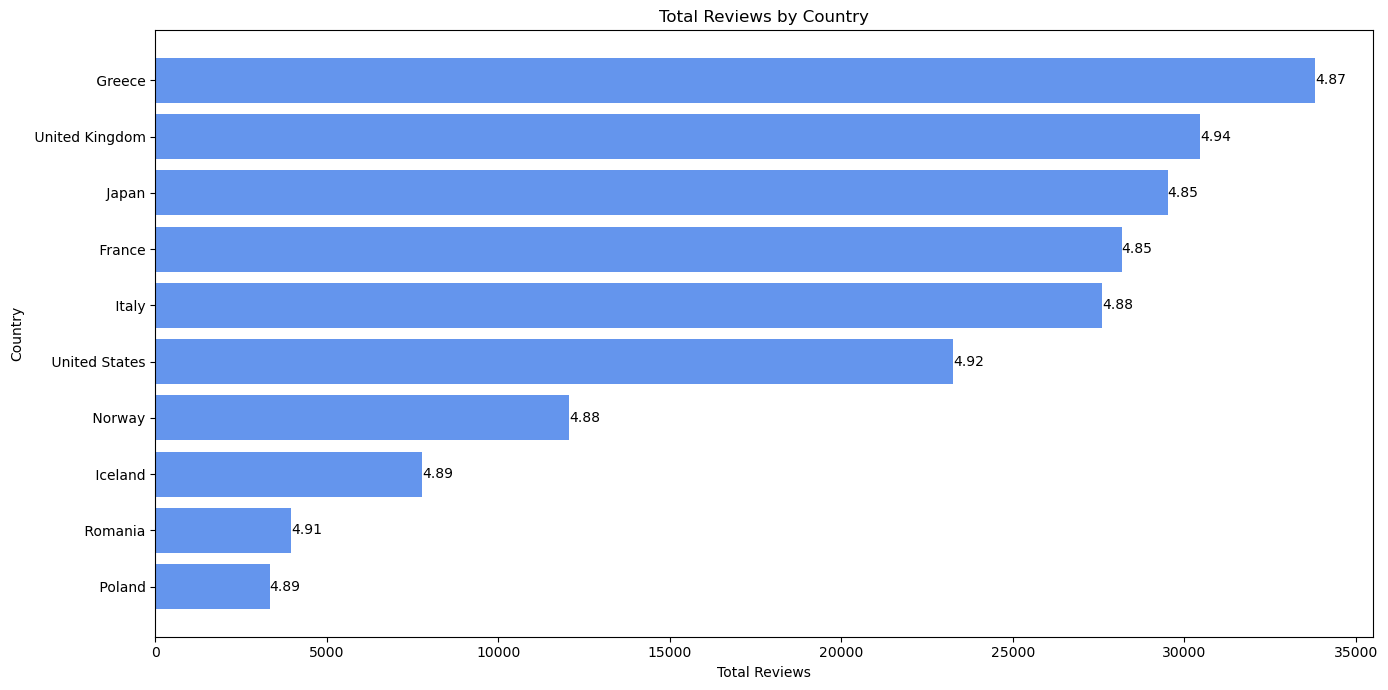

In [50]:
plot_bar(top_10_most_stellar_listings, 'country', 'rating', 'reviews', 0.01, 'Average Rating by Country', 'Average Rating', 'Country', True)
plot_bar(top_10_most_stellar_listings.sort_values(by='reviews', ascending=False), 'country', 'reviews', 'rating', 0.01, 'Total Reviews by Country', 'Total Reviews', 'Country', False)


In [51]:
top_10_high_stellar_density = country_summary[country_summary['country'].isin(top_ten_countries_stellar_percentage_names)]
top_10_high_stellar_density = top_10_high_stellar_density.sort_values(by=['rating', 'reviews'], ascending=[False, False])

top_10_high_stellar_density.head()

,country,rating,reviews
41,Ireland,4.95,1084
103,United Kingdom,4.94,30451
14,Canada,4.93,2127
104,United States,4.92,23251
7,Belize,4.89,475


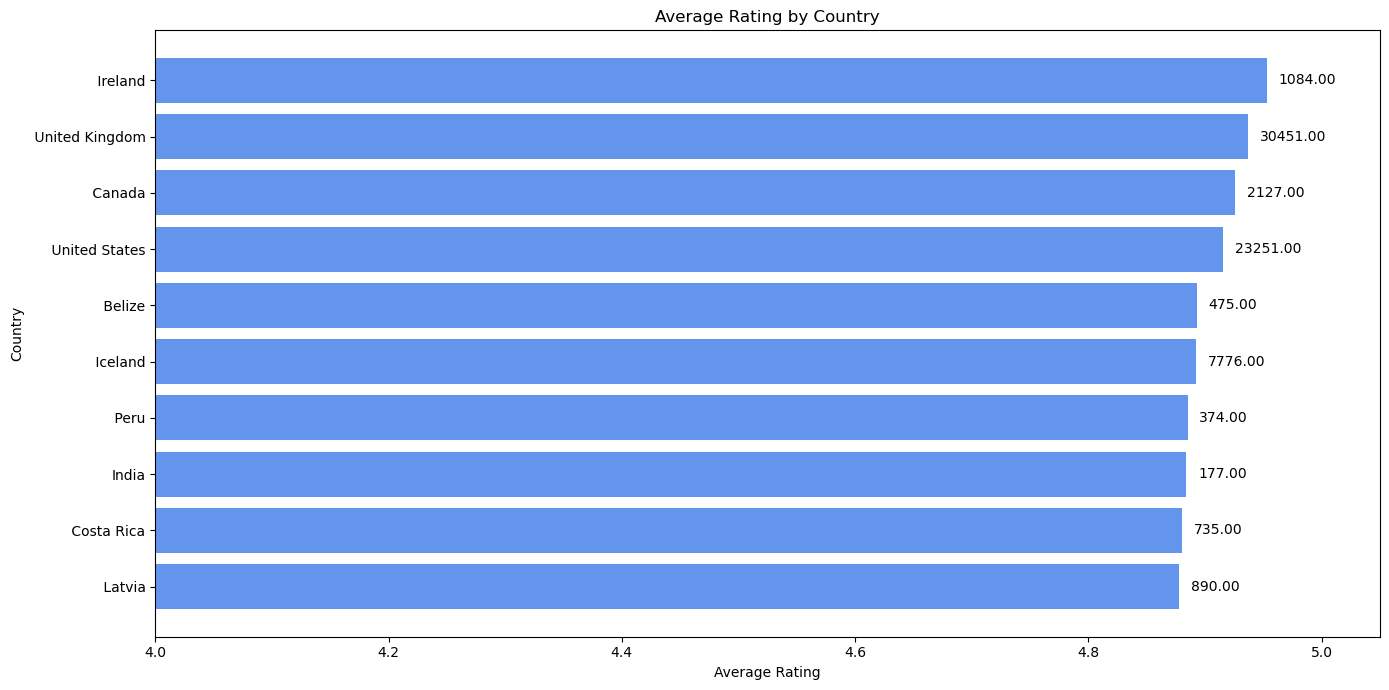

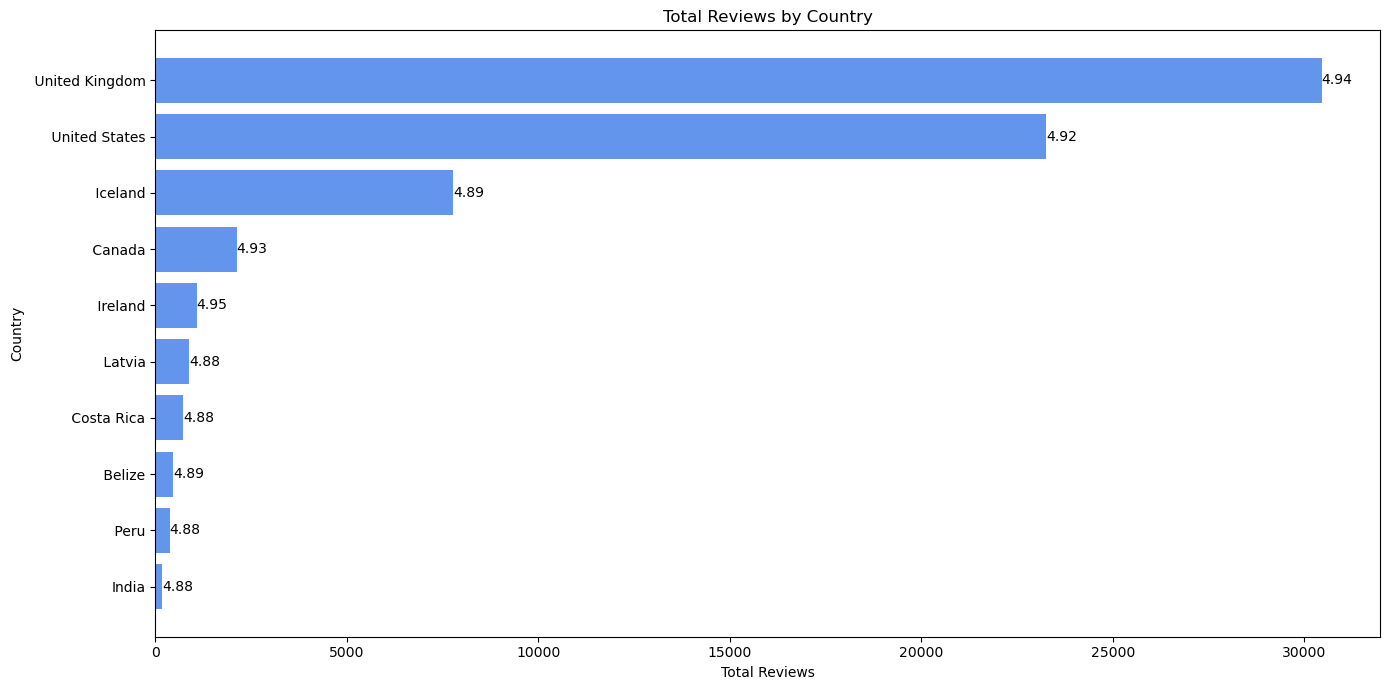

In [52]:
plot_bar(top_10_high_stellar_density, 'country', 'rating', 'reviews', 0.01, 'Average Rating by Country', 'Average Rating', 'Country', True)
plot_bar(top_10_high_stellar_density.sort_values(by='reviews', ascending=False), 'country', 'reviews', 'rating', 0.01, 'Total Reviews by Country', 'Total Reviews', 'Country', False)


In [53]:
countries_best = top_10_countries_raw_num_names.intersection(top_ten_countries_stellar_percentage_names)
high_demand_countries = country_summary[country_summary['country'].isin(countries_best)]

In [54]:
# Data preparation
top_ratings = high_demand_and_rating.sort_values(by='rating', ascending=False).head(20)
top_reviews = high_demand_and_rating.sort_values(by='reviews', ascending=False).head(20)

plot_bar(top_ratings, 'country', 'rating', 'reviews', 0.01, 'Average Rating by Country', 'Average Rating', 'Country', True)
plot_bar(top_reviews, 'country', 'reviews', 'rating', 0.01, 'Total Reviews by Country', 'Total Reviews', 'Country', False)


NameError: name 'high_demand_and_rating' is not defined